Base Image Loaded with examples: 23949
Scattering Flare Image: E:/dataset/Flare7Kpp/Flare7K  is loaded successfully with examples 5000
Now we have 5000 scattering flare images
Reflective Flare Image: E:/dataset/Flare7Kpp/Flare7K  is loaded successfully with examples 2000
Now we have 2000 reflective flare images
lightsource Image: E:/dataset/Flare7Kpp/Flare7k  is loaded successfully with examples 5000
Now we have 5000 lightsource images
99


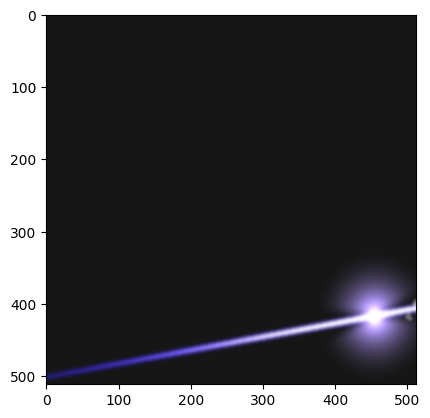

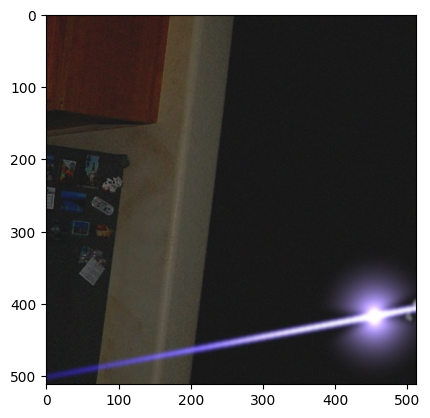

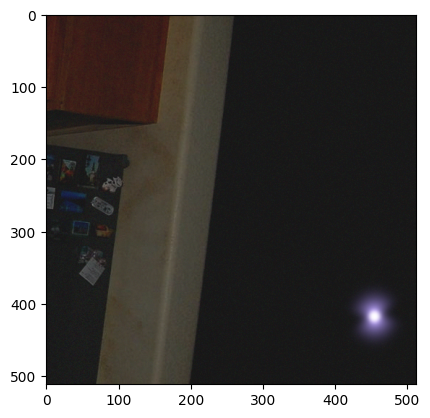

In [53]:
import random
from utils.flare7k_dataloader import Flare_Image_Loader
import torchvision.transforms as transforms
from matplotlib import pyplot as plt

transform_base=transforms.Compose([transforms.RandomCrop((512,512),pad_if_needed=True,padding_mode='reflect'),
							  transforms.RandomHorizontalFlip(),
							  transforms.RandomVerticalFlip()
                              ])

transform_flare=transforms.Compose([transforms.RandomAffine(degrees=(0,360),scale=(0.8,1.5),translate=(300/1440,300/1440),shear=(-20,20)),
                              transforms.CenterCrop((512,512)),
							  transforms.RandomHorizontalFlip(),
							  transforms.RandomVerticalFlip()
                              ])

flare_image_loader=Flare_Image_Loader('E:/dataset/Flickr24K',transform_base,transform_flare)
flare_image_loader.load_scattering_flare('E:/dataset/Flare7Kpp/Flare7K','E:/dataset/Flare7Kpp/Flare7k/Scattering_Flare/Compound_Flare')
flare_image_loader.load_reflective_flare('E:/dataset/Flare7Kpp/Flare7K','E:/dataset/Flare7Kpp/Flare7k/Reflective_Flare')
flare_image_loader.load_lightsource('E:/dataset/Flare7Kpp/Flare7k','E:/dataset/Flare7Kpp/Flare7k/Scattering_Flare/Light_Source')
# flare_image_loader.load_lightsource('E:/dataset/Flare7Kpp/Flare7K','E:/dataset/Flare7Kpp/Flare7k/Scattering_Flare/Core')
# img_index= random.randint(0,len(flare_image_loader)-1)
img_index= 99
test_base_img,test_flare_img,test_merge_img,flare_mask=flare_image_loader[img_index]

print(img_index)
plt.imshow(test_flare_img.permute(1,2,0))
plt.show()
plt.imshow(test_merge_img.permute(1,2,0))
plt.show()
plt.imshow(test_base_img.permute(1,2,0))
plt.show()

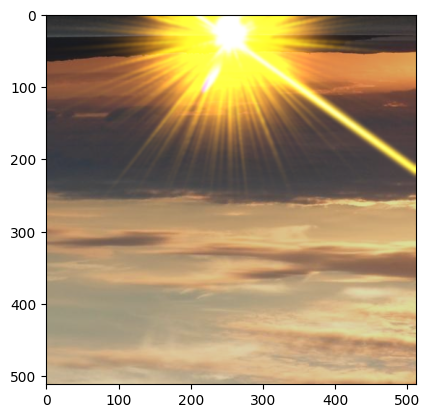

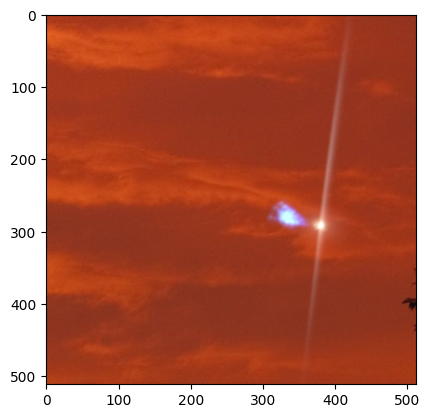

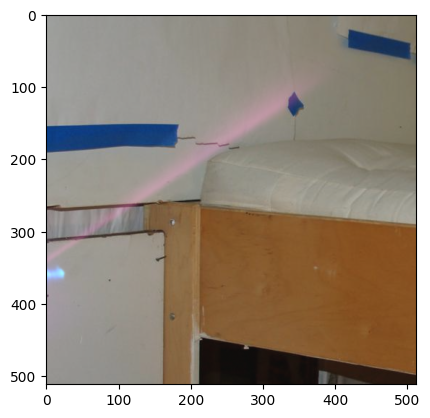

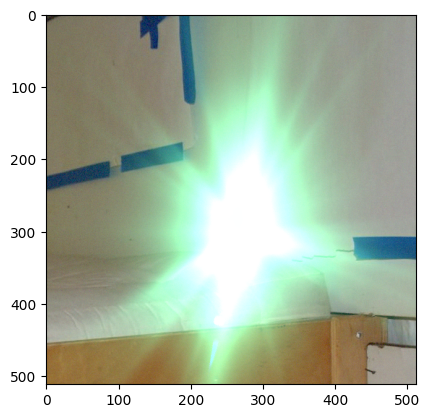

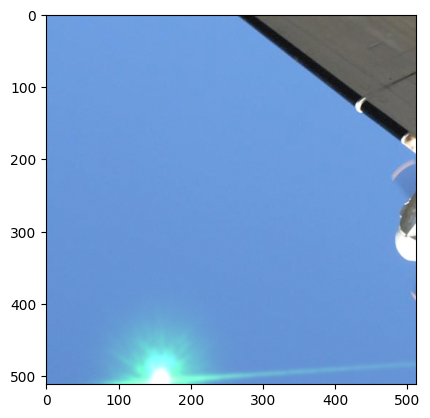

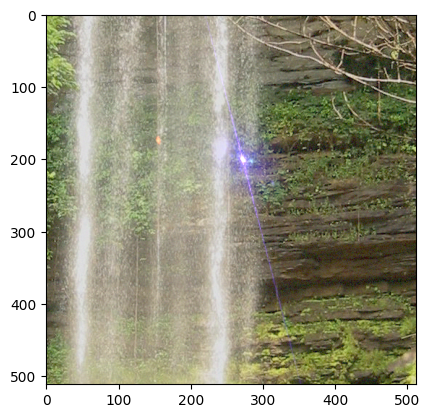

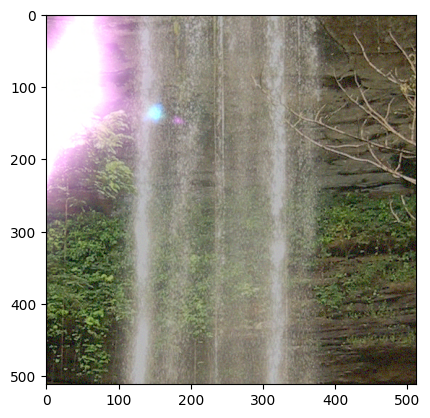

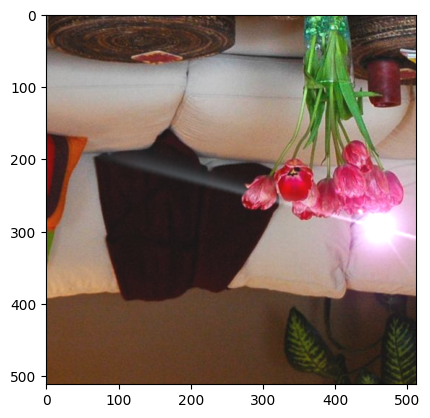

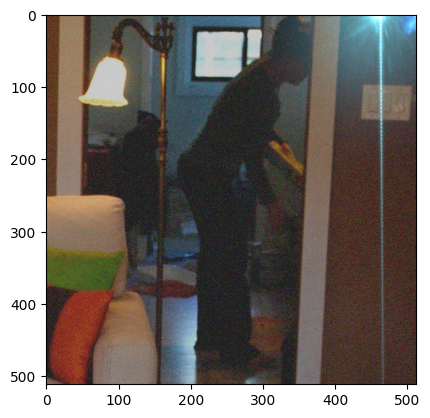

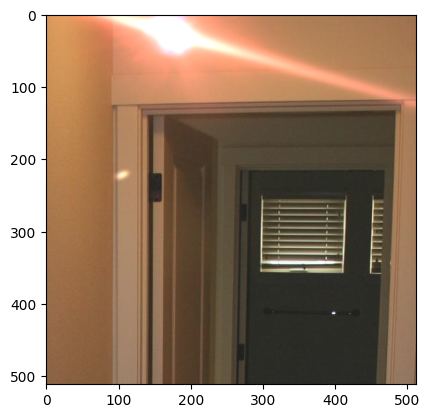

In [36]:
for i in range(10):
    test_base_img,test_flare_img,test_merge_img,flare_mask=flare_image_loader[i]
    plt.imshow(test_merge_img.permute(1,2,0))
    img_tensor=test_merge_img.permute(1,2,0)
    img_numpy=img_tensor.numpy()
    plt.show()

In [21]:
import torch
x = torch.randn(4, 3, 256, 256)  # batch_size=4, channels=64, height=32, width=32
y = torch.randn(4, 3, 256, 256)
z = torch.cat((x, y), dim=0)
print(z.shape)
xx,yy = torch.chunk(z, 2, dim=0)
print(xx.shape)
print(yy.shape)
print(xx==x)

torch.Size([8, 3, 256, 256])
torch.Size([4, 3, 256, 256])
torch.Size([4, 3, 256, 256])
tensor([[[[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]],

         [[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]],

         [[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
